# <center>Pima Indian Diabetes</center>

This dataset has been provided by **National Institute of Diabetes and Digestive and Kidney Diseases** on Kaggle to predict whether the patient has diabetes or not.

The data contains information about **FEMALES ABOVE 21 YEARS OF AGE ONLY.** It has mainly 8 independent features and 1 target variable, **OUTCOME** (1 or 0)

This notebook only consists of EDA; it does not contain any ML model techniques. This is a Binary Classification problem, where we can use a classification model to predict where the patient has diabetes or not. 

I will be uploading a notebook specifically on model building and optimization in coming days. Hope you like it! :)

**03/May/2021 UPDATE:** I have also included model building in this notebook. Please find it below! :)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Skip Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
diabetes_data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
diabetes_data.head()

In [ ]:
diabetes_data.describe(include = 'all')

In [ ]:
diabetes_data.hist(figsize=(20,12))

### Observations:

There seems to be something odd with *BMI, BloodPressure, Glucose, Insulin*, and *SkinThickness*. All of them have values in 0s. Practically, this is not possible. Let's dig deeper into this.

**Solution-** Replace these values using statistical techniques, preferably *mean*.

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

diabetes_data[cols] = diabetes_data[cols].astype("float")

fig = plt.figure(figsize=(25,100))

for i in range(0,len(cols)):
    ax = fig.add_subplot(20, 2,i+1)
    g = sns.distplot(diabetes_data[cols[i]], bins = 50)
    plt.xlabel(cols[i],fontsize = 22)
    plt.grid(True)

In [ ]:
sns.distplot(diabetes_data["Glucose"])

Exactly what we had hypothesized. There are a lot of values which are 0s.

#### A small summary of each graph
1. *Glucose* - Having glucose level less than 50 is very dangerous and not possible
2. *BloodPressure* - Having blood pressure lower than 40 is not possible.
3. *SkinThickiness* - Skin thickness with 0 means the person does not have any skin. This has to be replaced.
4. *Insulin* - The graph indicates that insulin levels are 0. Again, this case is not possible.
5. *BMI* - The lowest BMI possible is around 18. Lower than that is not possible.


Neither do I know what *DiabetesPedigreeFunction* is, nor the description of the data has mentioned what it is. Hence, I would not be making any changes here.
___

## Solution
Instead of dropping those rows, we could use them. This would be helpful for building ML models

**mean** is a fairly better replacement than randomly imputing those values.
___

#### Strategy for each column mentioned above
1. *Glucose* lower than 50 will be replaced by mean
2. *BloodPressure* lower than 40 will be replaced by the mean
3. *SkinThickiness* lower than 10 will be replaced by the mean
4. *Insulin* lower than 50 will be replaced by the mean
5. *BMI* lower than 18 will be replaced by the mean

In [ ]:
diabetes_data.loc[diabetes_data["Glucose"]<=50, "Glucose"] = np.NaN
diabetes_data.loc[diabetes_data["BloodPressure"]<=40, "BloodPressure"] = np.NaN
diabetes_data.loc[diabetes_data["SkinThickness"]<=10, "SkinThickness"] = np.NaN
diabetes_data.loc[diabetes_data["Insulin"]<=50, "Insulin"] = np.NaN
diabetes_data.loc[diabetes_data["BMI"]<=18, "BMI"] = np.NaN

In [ ]:
# Replacing the blood pressure level lower than 40 with the "mean" of blood pressure
diabetes_data["Glucose"] = diabetes_data["Glucose"].fillna(diabetes_data["Glucose"].mean())
diabetes_data["BloodPressure"] = diabetes_data["BloodPressure"].fillna(diabetes_data["BloodPressure"].mean())
diabetes_data["SkinThickness"] = diabetes_data["SkinThickness"].fillna(diabetes_data["SkinThickness"].mean())
diabetes_data["Insulin"] = diabetes_data["Insulin"].fillna(diabetes_data["Insulin"].mean())
diabetes_data["BMI"] = diabetes_data["BMI"].fillna(diabetes_data["BMI"].mean())


<div class="alert alert-block alert-info"><b> 

Q. Why did we replace the numbers with NaN?

A. If we had directly performed the **mean** operation, then even those values, which needed to be replaced, would have contributed to the mean. This would have been an *imperfect* mean.

Replacing those values with *NaN*, and then taking the mean helps in getting us *true-mean*
    </b></div>

___

Creating a copy **df** specifically for EDA

In [ ]:
df = diabetes_data.copy()

# <center>Exploratory Data Analysis</center>

All our features are numerical based, except the target variable. Hence, it is better to analyse them using *BINNING*, or *BUCKETING*.

### 1. AGE

In [ ]:
bins = [0,20,30,40,50,60,70,80,100]
labels = ["0-20", "20-30","30-40","40-50","50-60","60-70","70-80","80+"]
df['Age Bracket'] = pd.cut(df["Age"], bins, labels = labels)

In [ ]:
plt.figure(figsize = (8,5))

sns.countplot(df["Age Bracket"], hue = df["Outcome"])

Based on the data, it can be seen that females tend to contract diabetes from their 30's. It is alarming that in the age bracket *30-40*, females having diabetes and not having diabetes are almost equal.

Subsequently in the age brackets *40-50* and *50-60*, number of females having diabetes **surpases** the number of females that do not have diabetes. 

If you notice, the rate at which females contract diabetes drastically increases from the age bracket *20-30* to rest of the brackets.

___
### 2. Blood Pressure

Since the analysis of *Blood Pressure* can be easily interpretable using bucketing, it is best do the same way.

The figure below shows the correct ranges of blood pressure ranges.

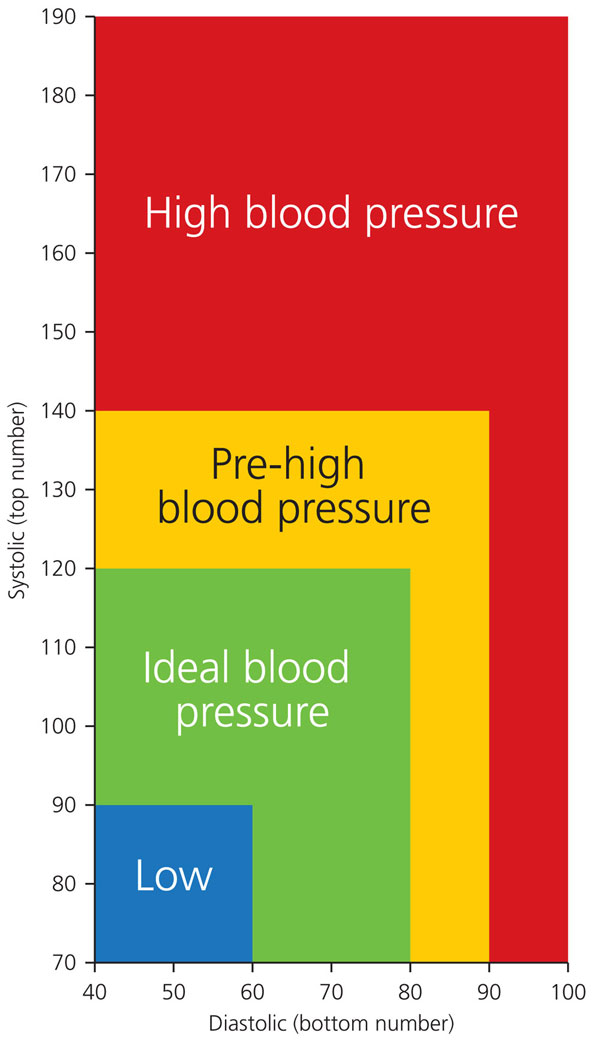

Reference: https://cdn.viva.org.uk/wp-content/uploads/2020/07/Blood-pressure-graph.jpg

In [ ]:
bp_bins = [0,60,80,90,100]
bp_labels = ["Low BP","Ideal BP", "Pre-high BP", "High BP"]
df["BloodPressure Buckets"] = pd.cut(df["BloodPressure"], bp_bins, labels = bp_labels)

In [ ]:
df["BloodPressure Buckets"].value_counts()

In [ ]:
plt.figure(figsize = (8,6))

sns.countplot(x = df["BloodPressure Buckets"], hue = df["Outcome"])
sns.set(font_scale = 1.1)


As per the graph, females having *Pre-High Blood Pressure* and *High Blood Pressure* are at a higher risk of being diagnosed with diabetes. 

As mentioned in this article, "The condition occurs in as many as two-thirds of people with diabetes and places these individuals at twice the risk of heart disease than a person only dealing with high blood pressure." 

Reference: https://www.canopyhealth.com/en/members/articles/high-blood-pressure-and-type-two-diabetes.html

___
## 3. Pregnancies

In [ ]:
plt.figure(figsize = (8,6))

sns.countplot(x = df["Pregnancies"], hue = df["Outcome"])
sns.set(font_scale = 1)


Ladies who have had babies *more than 6 times* have higher risk of having diabetes.

___
## 4. Glucose

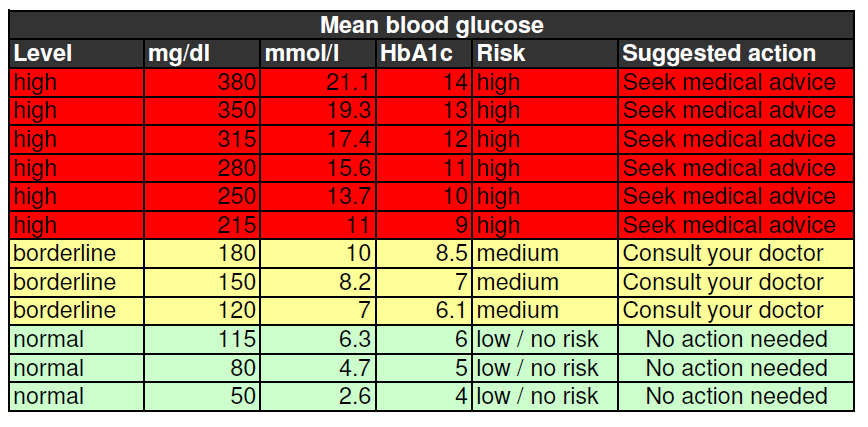



Reference: https://www.pinterest.com/pin/425168021046555513/


The bucketing has been done using above chart

In [ ]:
glucose_bins = [0,115,180,380]
glucose_labels = ["Normal Levels","Elevated Levels", "Severly Elevated"]
df["Glucose Buckets"] = pd.cut(df["Glucose"], glucose_bins, labels = glucose_labels)

In [ ]:
plt.figure(figsize = (8,6))

sns.countplot(df["Glucose Buckets"], hue = df["Outcome"])
sns.set(font_scale = 2.1)


Using the above reference chart, we can see that females with *Elevated Levels* and *Severly Elevated* of glucose have higher risk of being diagnosed with diabetes. And that makes sense as well.

The higher the sugar level (or glucose in medical terms), the higher the risk of being diagnosed with diabetes.

___
## 5. Insulin

In [ ]:
sns.distplot(df["Insulin"], bins = 20)

I did not really find anything on Insulin, because insulin measures are taken before and after the diabetes test. In this dataset, there is only one column of Insulin, without any description if this is pre-test results or post-test results.

Hence, I cannot comment about any trends or insights on Insulin.

___



## 6. Skin Thickness

In [ ]:
sns.distplot(df["SkinThickness"], bins = 20)

Unfortunately, I did not find anything that relates skin thickness to diabetes on the internet. I'm sure there is, although I'm not a medical practitioner. Hence it is better to not write something incorrect.

___
## 7. BMI

Body mass index, (BMI), is a measure of body size. It combines a person’s weight with their height. The results of a BMI measurement can give an idea about whether a person has the correct weight for their height.

BMI is used as a diagnostic tool to screen potential weight problems in adults and in children. It is not the most accurate measure, although it helps to determine various health challenges.

Reference: https://www.medicalnewstoday.com/articles/323622#how-doctors-use-bmi

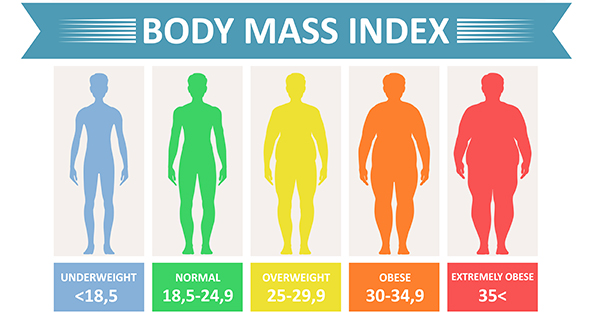

Reference: https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg

In [ ]:
bmi_bins = [0,18,20,25,30,35]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese", "Extremely Obese"]
df["BMI Buckets"] = pd.cut(df["BMI"], bmi_bins, labels = bmi_labels)

In [ ]:
plt.figure(figsize = (8,6))

sns.countplot(df["BMI Buckets"], hue = df["Outcome"])#, color = df["Outcome"])
sns.set(font_scale = 1.9)


The main insight is if the the BMI is *above Normal*, then a female is likely to be diagnosed with diabetes, especially the ones who are *Extremely Obese*.
___


## Boxplots

It is always necessary to check the distribution of the data set. It helps us check for any outliers. Boxplot helps us do the same.

In [ ]:

fig = plt.figure(figsize=(30,110))

for i in range(0,len(cols)):
    ax = fig.add_subplot(20, 2,i+1)
    ax = sns.boxplot(x = df[cols[i]], hue = ["Outcome"], palette="Set3") #, bins = 50)
    plt.xlabel(cols[i],fontsize = 20)
    plt.grid(True)

It is evident that there are outliers in the data, for eg.:
1. *Insulin*: There are a lot of values beyond 500, which seems vague. We can either drop them, or consult a medical practioner for further information.
2. *SkinThickness*: There is just one value that is 100. We can surely drop it.
3. *DiabetesPedigreeFunction*: As I menioned above in the notebook, we do not have any information on this feature; neither in the data description, nor on the internet. Hence, I cannot determine the significance of this feature. Although, the distribution looks fair and I **assume** that there are no outliers. The are true values.



This mainly completes the extensive EDA on the dataset. If you like it, please feel free to hit the like and comment for any improvements.



___

# Model Building



### Checking the distribution of the target variable, *Outcome*

In [ ]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x = diabetes_data["Outcome"]) #, y = len(diabetes_data))
ncount = len(diabetes_data)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
    
# Code Reference: https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

We can see that our dataset is fairly balanced. Hence, there is no need for us to perform SMOTE (synthetic minority oversampling technique).

In [ ]:
diabetes_data["Outcome"].value_counts()/(len(diabetes_data["Outcome"]))*100

### Separating the independent variables and target variable

**NOTE**: We had used **df** which had been bucketed specifically for EDA and gather insights. For model building, we will be using **diabetes_data.**

We have already observed and changed the **diabetes_data**. Hence, we can directly start using the **diabetes_data.**

In [ ]:
# Independent variables
X = diabetes_data.drop("Outcome", axis = 1)

# Target variable
y = diabetes_data["Outcome"]

### Train Test Split

Whenever we build a classification model, we should ensure to include the parameter **stratify**. What this does is instead of randomly splitting the dataset, *train_test_split* splits the training and validation datasets *in proportion with* as that of in the original dataset.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1234)

### Model training and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
def model_building(model, parameters = None, cv = 10, scale = False):
    if parameters == None:
        clf = model.fit(X_train, y_train)
        actual_train = y_train
        prediction_train = clf.predict(X_train)
        actual_valid = y_valid
        prediction_valid = clf.predict(X_valid)
        
        ####### Model Evaluation #######
        print("---------",model,"-----------")
        print("----TRAINING REPORT------\n")
        print(classification_report(actual_train, prediction_train, digits=4))
        print("AUC-ROC Score: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        print("----VALIDATION REPORT------\n")
        print(classification_report(actual_valid, prediction_valid, digits=4))
        print("AUC-ROC Score: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        return(model, prediction_train, prediction_valid)
    else:
        model_cv = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
        model_cv.fit(X_train, y_train)
        actual_train = y_train
        prediction_train = model.predict(X_train)
        actual_valid = y_valid
        prediction_valid = model.predict(X_valid)
        
        ####### Model Evaluation #######
        print("---------",model,"-----------")
        print("----TRAINING REPORT------\n")
        print(classification_report(actual_train, prediction_train, digits=4))
        print("AUC-ROC Score: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        print("----VALIDATION REPORT------\n")
        print(classification_report(actual_valid, prediction_valid, digits=4))
        print("AUC-ROC Score: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        model = model_cv.best_estimator_
    

        return(model_cv, prediction_train, prediction_valid)

This is a *BINARY CLASSIFICATION* problem, i.e. 1 or 0. Hence, we will be testing the model using following algorithma:

1. Logistic Regression
2. KNearest Neighbour Classifier 
3. Decision Tree Classifier 
4. Gradient Boost Classifier
5. Random Forest Classifier

Our target variable will be **OUTCOME.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier()]
# parameters = 
for model in models :
    
    model, pred_train, pred_valid = model_building(model, cv=10)

<div class = 'alert alert-block alert-warning'>
    Choosing the correct metrics for model evaluation is a very important step for any model performance evaluation.
    

</div>
<div class = 'alert alert-block alert-success'>In this case, since there is no metrics mentioned, we would consider <b>F1 Score</b> as our primary metrics, because it takes into account both False Positive and False Negative results. One may choose some other metrics as well.

</div>

## Observations (at the time of running the script)

1. We can see that AUC-ROC Score is the best for **Logistic Regression** with 77%, followed by **Random Forest Classifier** with 74%. However, it is necessary to look at other metrics as well.

2. **Decision Tree Classifier** is the lowest performing model, as the accuracy is the lowest with 69%.

3. If you notice, **Decision Tree Classifier** and **Random Forest Classifier** have all the training values as 1. This means that the model is overfitting in training dataset. And it makes sense as well, because these algorithms learn the data completely and shows uch classification report.

4. **Logistic Regression** tends to *underfit*, as the training report is less than that of validation report, with 75% and 81% respectively. However, I would claim that this is the best performing model of all other models.

5. If you look at **AdaBoost Classifier**, it tends to overfit the model, as the training accuracy is higher than the validation accuracy.

## Concluding Notes:

1. We have limited data; only 768. Had we had more data, our model performance would have been much better.
2. Selection of performance metrics is necessary. Here, the problem statement had not mentioned about the metric. Hence we decided to go with F1-Score.

Hope this was helpful! :)

# <center>End of the notebook</center>